# Inference with pre-trained models

In this notebook, we show how to perform object detection with pre-trained models using MMDetection.

This step is also called *inference*.


## Installation

Run in command line

```
pip install openmim, mmengine
mim install mmcv-full mmdet
```

copy & paste above codes to command line IF packages are NOT installed

## Config and Checkpoint File

**Config file**

All items required to define a training *experiment*, including

- model
- dataset and data augmentation pipeline
- training algorithms and learning rate policies
- runtime config of the program

**Checkpoint file**

A pytorch `pth` file, containing the `state_dict` of a model as well as some meta information.
A checkpoint file is usually trained from a config file, using the toolbox.

We can navigate to [home page](https://github.com/open-mmlab/mmdetection) to select a model
and download corresponding config & checkpoint file using `mim`.

```
mim download mmdet --config yolox_tiny_8x8_300e_coco --dest . 
```

In [1]:
!mim download mmdet --config yolox_tiny_8x8_300e_coco --dest . 

processing yolox_tiny_8x8_300e_coco...
yolox_tiny_8x8_300e_coco_20211124_171234-b4047906.pth exists in C:\wangruohui\桌面\sjtu-openmmlab-tutorial
Successfully dumped yolox_tiny_8x8_300e_coco.py to C:\wangruohui\桌面\sjtu-openmmlab-tutorial


C:\Users\wangruohui\Miniconda3\envs\mm\lib\site-packages\_distutils_hack\__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


## Inference using high-level API

In [2]:
from mmdet.apis import init_detector, inference_detector

In [3]:
model = init_detector('yolox_tiny_8x8_300e_coco.py', 
                      'yolox_tiny_8x8_300e_coco_20211124_171234-b4047906.pth', 
                      device='cuda:0')

load checkpoint from local path: yolox_tiny_8x8_300e_coco_20211124_171234-b4047906.pth


In [4]:
result = inference_detector(model, 'bench.jpg')

C:\Users\wangruohui\Miniconda3\envs\mm\lib\site-packages\torch\functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [5]:
result

[array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([[ 2.94505280e+02,  1.16156982e+02,  3.75637421e+02,
          1.50079758e+02,  8.66280198e-01],
        [ 1.85152451e+02,  1.08360527e+02,  2.97110291e+02,
          1.55370819e+02,  8.47681046e-01],
        [ 6.08998962e+02,  1.09609398e+02,  6.39139343e+02,
          1.37917221e+02,  7.84630656e-01],
        [ 4.80495392e+02,  1.09879059e+02,  5.22631042e+02,
          1.30804001e+02,  7.69360662e-01],
        [ 4.30466980e+02,  1.05079704e+02,  4.84936340e+02,
          1.31886200e+02,  7.16043174e-01],
        [ 2.67565002e+02,  1.04939713e+02,  3.24060455e+02,
          1.28701309e+02,  6.02069736e-01],
        [ 3.98489716e+02,  1.11599953e+02,  4.31995880e+02,
          1.32892288e+02,  5.74710429e-01],
        [ 1.67910446e+02,  1.08556076e+02,  2.22792389e+02,
          1.43017197e+02,  5.62003732e-01],
        [ 6.91595612e+01,  8.60775299e+01,  1.19290199e+02,
          1.04368294e+02, 

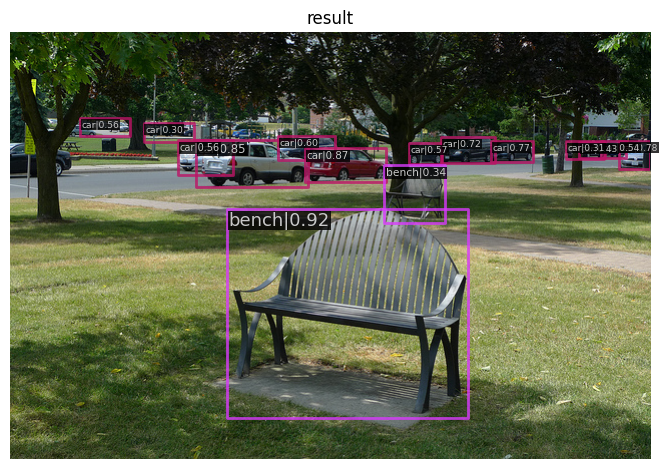

In [6]:
from mmdet.apis import show_result_pyplot

show_result_pyplot(model, 'bench.jpg', result)